In [13]:
import matplotlib.pyplot as plt
import json5

In [14]:
def appendEntry(lat=0,long=0,hr = 0):
    lats.append(lat)
    longs.append(long)
    hrs.append(hr)
def findHR(timein = 0):
    for i in hritems:
        if i[0] >= timein:
            return i[1]
    return hritems[-1][1]


In [15]:
f = open('ride.json')
print(f)
js = json5.load(f)


#JSON structure
#['Meta data'] Metadata

#GPS data
#['data'][0]['values']
# =["time","latlng","elevation","h_accuracy","v_accuracy","speed","course","device_time","distance"]

#HR logging
#['data'][1]['values'] = ["time",'HR']

<_io.TextIOWrapper name='ride2.json' mode='r' encoding='cp1252'>


In [16]:
speeds=[]
lats = []
longs =[]
hrs =[]
elevations =[]
distances = []
rideData = js['data']
locitems = rideData[0]['values']
hritems = rideData[1]['values']
for i in locitems:
    hr = findHR(i[0])
    appendEntry(i[1][0],i[1][1],hr)

for s in locitems:
    speeds.append(s[5]*2.24)
for l in locitems:
    elevations.append(l[2]*3.28084)
for d in locitems:
    distances.append(d[8]*0.000621371)

<IPython.core.display.Javascript object>


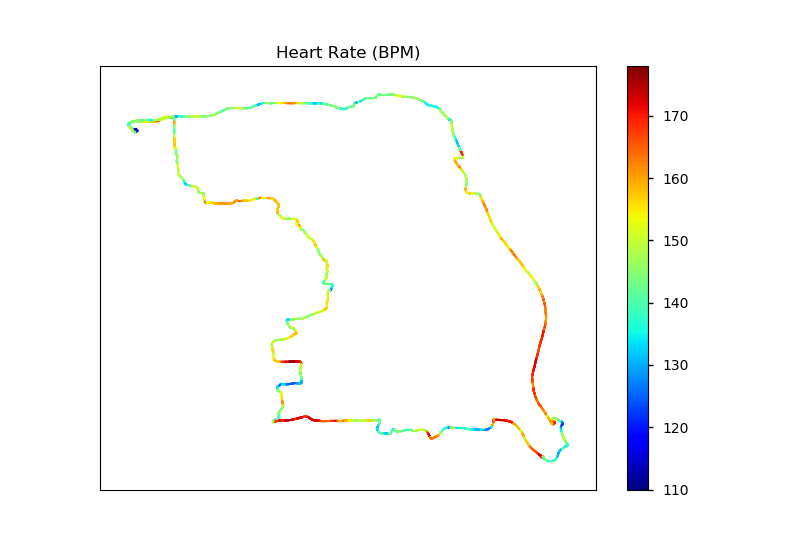

In [17]:
%matplotlib notebook
plt.title("Heart Rate (BPM)")
plt.xticks([])
plt.yticks([])
plt.style.use('seaborn-notebook')
plt.scatter(longs,lats,c=hrs,cmap = 'jet',s =1.5)
plt.colorbar()
plt.show()
plt.savefig('hr.png',dpi = 250)

<IPython.core.display.Javascript object>


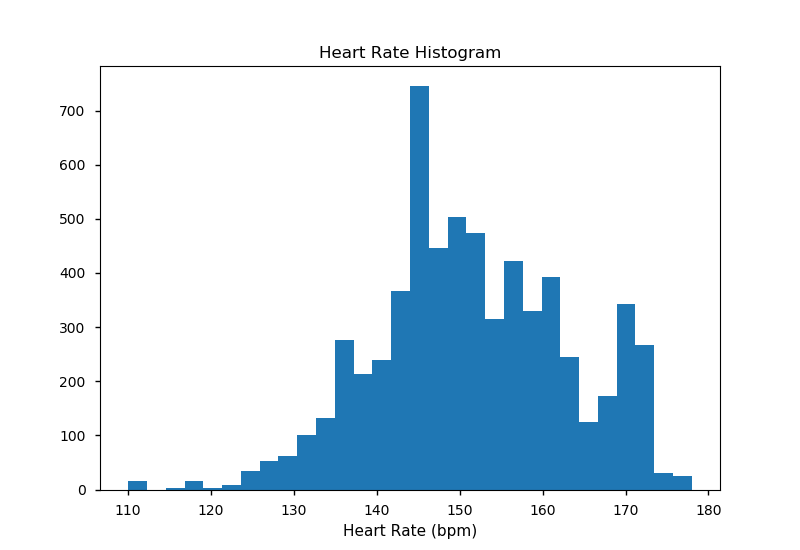

In [18]:
plt.close()
plt.title('Heart Rate Histogram')
plt.xlabel('Heart Rate (bpm)')
plt.hist(hrs,bins = 30)
plt.show()
plt.savefig('hrhist.png',dpi = 250)

<IPython.core.display.Javascript object>


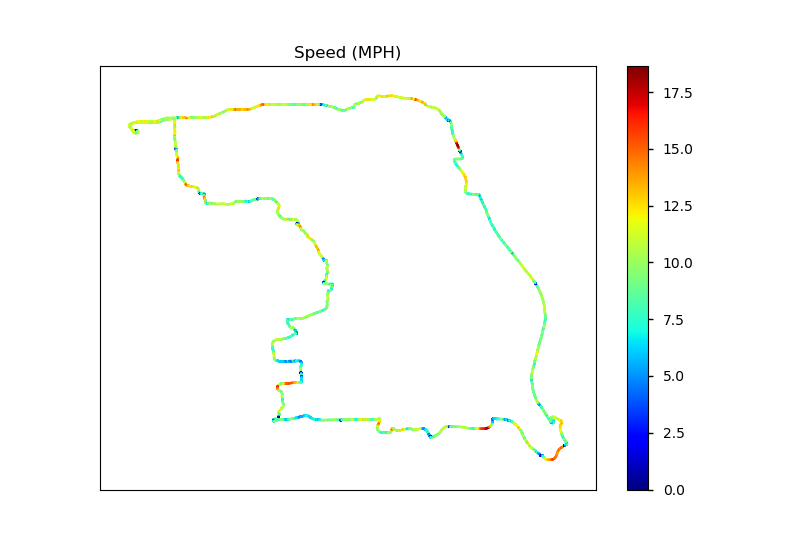

In [12]:
plt.close()
plt.xticks([])
plt.yticks([])
plt.title("Speed (MPH)")
plt.scatter(longs,lats,c=speeds,cmap = 'jet',s =2)
plt.colorbar()
plt.show()
plt.savefig('speed.png',dpi = 250)

<IPython.core.display.Javascript object>


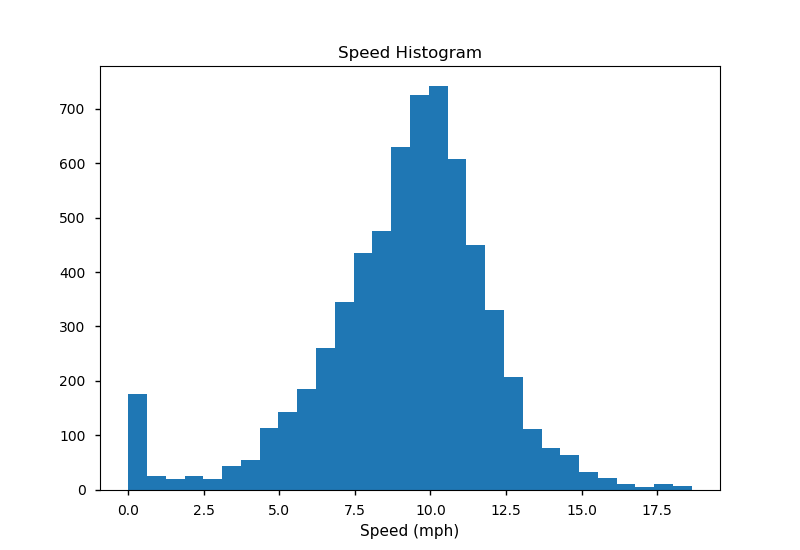

In [19]:
plt.close()
plt.hist(speeds,bins = 30)
plt.title('Speed Histogram')
plt.xlabel('Speed (mph)')
plt.show()
plt.savefig('speedhist.png',dpi = 250)

<IPython.core.display.Javascript object>


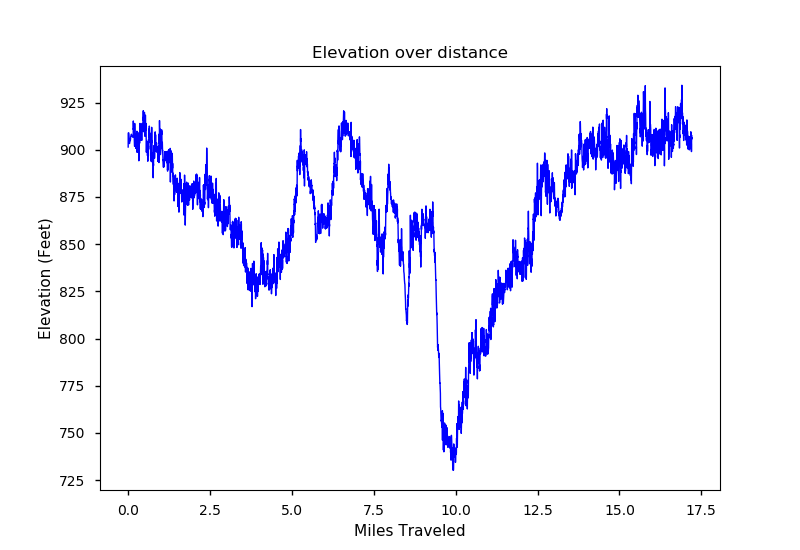

In [9]:
plt.close()
plt.plot(distances,elevations,lw =1, color = 'b')
plt.ylabel('Elevation (Feet)')
plt.xlabel('Miles Traveled')
plt.title('Elevation over distance')
plt.show()
plt.savefig('ele.png',dpi = 250)

In [20]:
plt.close()